In [41]:
%matplotlib inline

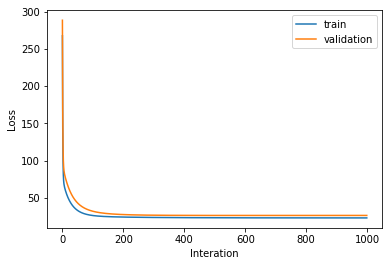

In [42]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def get_data():
    data = load_svmlight_file("./housing_scale.txt")
    return data[0].todense(), data[1].reshape(len(data[1]),1)
def split_data(X,y):
    X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.3)
    return X_train, X_validation, y_train, y_validation
def gradient_compute(X, y, w, m):
    return 2.0/m*(-X.T*y + X.T*X*w)
def loss(X, y, w, m):
    return 1.0/m*(y-X*w).T*(y-X*w)



interation = 1000
n = 0.05
Interation = []
loss_train = []
loss_validation = []
feature, label = get_data()
feature_train, feature_validation, label_train, label_validation = split_data(feature,label)
row, column = feature.shape[0], feature.shape[1]

w = np.zeros(column).reshape(column,1)

for i in range(0,interation):
    gradient = gradient_compute(feature, label, w, row)
    D = -gradient
    w = w + n*D
    Interation.append(i)
    loss_train.append(loss(feature_train, label_train, w, feature_train.shape[0]).sum())
    loss_validation.append(loss(feature_validation, label_validation, w, feature_validation.shape[0]).sum())


plt.xlabel("Interation")
plt.ylabel("Loss")
plt.plot(Interation,loss_train,label = "train")
plt.plot(Interation,loss_validation,label = "validation")
plt.legend(loc='upper right')

    

